Mean value =  0.0038584454391769846
Standard deviation value =  1.0103273843247482


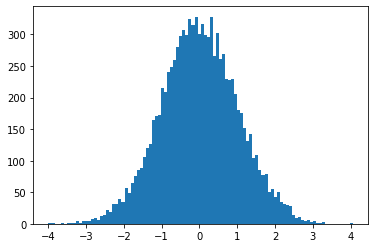

In [98]:
#independent and correlated data

import numpy as np
import numpy.random as npr
import pandas as pa
import matplotlib.pyplot as mp


mu=0
sigma=1
noSamples=10000

numVec=npr.normal(mu,sigma,noSamples)
mp.hist(numVec,100)
print('Mean value = ',np.mean(numVec))
print('Standard deviation value = ',np.std(numVec))




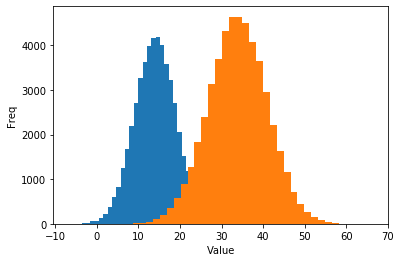

In [104]:
#independent and correlated data

import numpy as np
import numpy.random as npr
import pandas as pa
import matplotlib.pyplot as mp

noSamples=50000

mu1=14
sigma1=5
numVec1=npr.normal(mu1,sigma1,noSamples)

mu2=34
sigma2=7
numVec2=npr.normal(mu2,sigma2,noSamples)

mp.hist(numVec1,40)
mp.hist(numVec2,40)
mp.ylabel('Freq')
mp.xlabel('Value')
mp.show()

[[1.         0.03830716]
 [0.03830716 1.        ]]


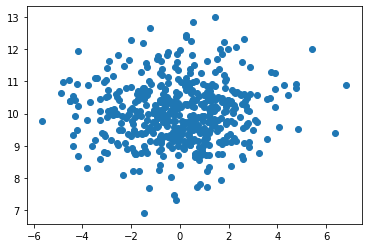

In [106]:
#independent and correlated data

import numpy as np
import numpy.random as npr
import pandas as pa
import matplotlib.pyplot as mp

noSamples=500


mu1=0
sigma1=2
numVec1=npr.normal(mu1,sigma1,noSamples)

mu2=10
sigma2=1
numVec2=npr.normal(mu2,sigma2,noSamples)

print(np.corrcoef(numVec1, numVec2))

mp.scatter(numVec1,numVec2)
mp.show()

[[1. 1.]
 [1. 1.]]


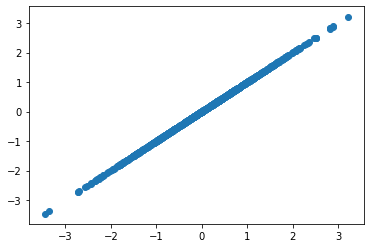

0.0038584454391769846
()
(10000,)


In [112]:
#independent and correlated data

import numpy as np
import numpy.random as npr
import pandas as pa
import matplotlib.pyplot as mp


mu=np.array([0,0])
covMat=np.array([(1,1),(1,1)])

numMat=npr.multivariate_normal(mu,covMat,1000)
numVec1,numVec2=numMat[:,0],numMat[:,1]

print(np.corrcoef(numVec1, numVec2))

mp.scatter(numVec1,numVec2)
mp.show()


emMean=numVec.mean()
emCov=np.cov(numVec)
print(emMean)
print(emCov.shape)
print(numVec.shape)

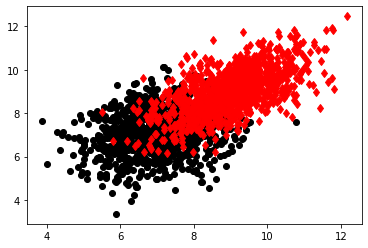

(1000, 4)


In [121]:
#creating dataset 1
import numpy as np
import numpy.random as npr
import pandas as pa
import matplotlib.pyplot as mp


mu=np.array([7,7])
covMat=np.array([(1,0.2),(0.2,1)])

X=npr.multivariate_normal(mu,covMat,1000)

mu=np.array([9,9])
#mu=np.array([15,15])
covMat=np.array([(1,0.6),(0.6,1)])

Y=npr.multivariate_normal(mu,covMat,1000)

mp.plot(X[:,0],X[:,1],'ok')
mp.plot(Y[:,0],Y[:,1],'dr')

mp.show()

data=np.concatenate([X.T,Y.T])
data=data.T
print(data.shape)
dFrame=pa.DataFrame(data)
dFrame.to_csv('dataW3Test1.csv')


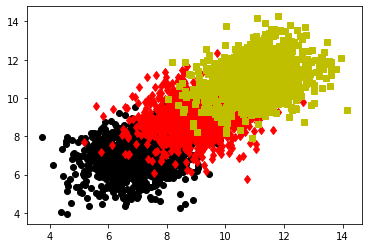

(1000, 6)


In [133]:
# creating dataset 2
import numpy as np
import numpy.random as npr
import pandas as pa
import matplotlib.pyplot as mp


mu=np.array([7,7])
covMat=np.array([(1,0.2),(0.2,1)])

X=npr.multivariate_normal(mu,covMat,1000)

mu=np.array([9,9])
covMat=np.array([(1,0.2),(0.2,1)])
Y=npr.multivariate_normal(mu,covMat,1000)

mu=np.array([11,11])
covMat=np.array([(1,0.2),(0.2,1)])
Z=npr.multivariate_normal(mu,covMat,1000)



mp.plot(X[:,0],X[:,1],'ok')
mp.plot(Y[:,0],Y[:,1],'dr')
mp.plot(Z[:,0],Z[:,1],'sy')

mp.show()

data=np.concatenate([X.T,Y.T,Z.T])
data=data.T
print(data.shape)
dFrame=pa.DataFrame(data)
dFrame.to_csv('dataW3Test2.csv')


(1000, 5)
(1000, 2)
(1000, 2)


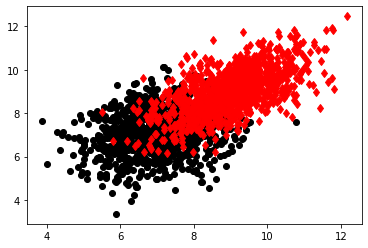

(2000, 2)


In [122]:
#Loading and preparing dataset 1
import numpy as np
import numpy.random as npr
import pandas as pa
import matplotlib.pyplot as mp

dFrame=pa.read_csv('dataW3Test1.csv')
print(dFrame.shape)
data1=dFrame.iloc[:,1:3].values
data2=dFrame.iloc[:,3:5].values

print(data1.shape)
print(data2.shape)

mp.plot(data1[:,0],data1[:,1],'ok')
mp.plot(data2[:,0],data2[:,1],'dr')
mp.show()

X=np.concatenate([data1,data2])
print(X.shape)


(1000, 7)
(1000, 2)
(1000, 2)
(1000, 2)


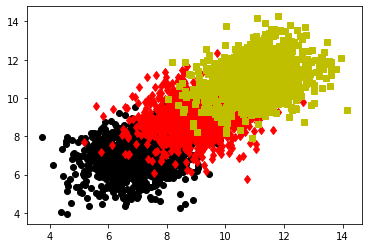

(3000, 2)


In [134]:
#Loading and preparing dataset 2
import numpy as np
import numpy.random as npr
import pandas as pa
import matplotlib.pyplot as mp

dFrame=pa.read_csv('dataW3Test2.csv')
print(dFrame.shape)
data1=dFrame.iloc[:,1:3].values
data2=dFrame.iloc[:,3:5].values
data3=dFrame.iloc[:,5:7].values


print(data1.shape)
print(data2.shape)
print(data3.shape)

mp.plot(data1[:,0],data1[:,1],'ok')
mp.plot(data2[:,0],data2[:,1],'dr')
mp.plot(data3[:,0],data3[:,1],'sy')
mp.show()

X=np.concatenate([data1,data2,data3])
print(X.shape)


In [139]:
#clustering and centroids
import sklearn.cluster as skc

#kmns=skc.KMeans(n_clusters=2)
#kmns=skc.KMeans(n_clusters=2,init='random')
kmns=skc.KMeans(n_clusters=4,init='random',)
print(kmns)
kmns.fit(X)

centroids=kmns.cluster_centers_
labels=kmns.labels_

print(centroids)
print(labels)



KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)
[[ 8.31733285  8.26983431]
 [ 6.6304179   6.68956439]
 [11.41425968 11.38092007]
 [ 9.79369851  9.84058941]]
[1 1 1 ... 2 2 2]


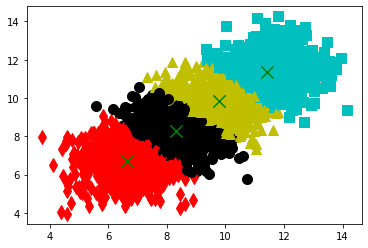

In [140]:
# visualisation of clusters

colors = ["ok","dr","sc","^y"]

for i in range(len(X)):
    mp.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


# Visualize the centroids
mp.scatter(centroids[:, 0],centroids[:, 1], color='green',marker = "x", s=150, linewidths = 5, zorder = 10)
mp.show()

Text(0.5, 0, 'Number of cluster')

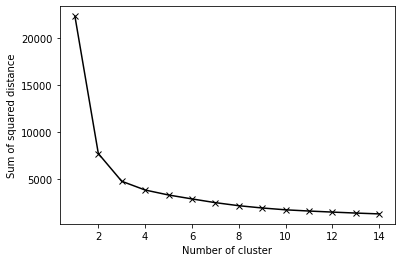

In [137]:
# finding number of clusters
totSqrdDist=[]
kRange=range(1,15)
for k in kRange:
    kmns=skc.KMeans(n_clusters=k)
    kmns=kmns.fit(X)
    totSqrdDist.append(kmns.inertia_)

mp.plot(kRange,totSqrdDist,'-xk')
mp.ylabel('Sum of squared distance')
mp.xlabel('Number of cluster')